# Impact of varying the caring coefficient

### Grid World Description:
There are two agents.
Both have the objective of reaching their respective door.
Both their rewards are -1 except when they reach their doors.
There are 8 actions (4 movements, 1 do nothing, 1 pick up, 1 drop, and 1 use).
The episode terminates if they collide with the wall, or with each other.


## Aim:
Show that if we consider red agent to start caring, it can avoid negative effects.
We can increase this "caring" by increasing the caring coefficient, but a big value can in fact be bad for both.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from collections import defaultdict
import random
plt.style.use("ggplot")
rcParams['figure.figsize'] = 10, 10

In [ ]:
dimension = 10

# represents the size of the world
main_axis = ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '', '']
grid_axis = np.linspace(0, 13, 13)
grid_interval = grid_axis[1] - grid_axis[0]
door_width = 0.1
grid_world = np.zeros((dimension+1, dimension+1))

actions = {0:'pick up', 1:'use', 5:'drop', 8:'up', 4: 'left', 2: 'down', 6:'right', 3:"do nothing"}

class EscapeRoom:

    def __init__(self):
        """
        Initializes everything
        """

        # setting default values
        default_params = {'p1' : [4, 6], 'p2' : [2, 1], 'k1' : [2, 4], 'k2' : [3, 9],
                          'd1' : [0, 5], 'd2' : [5,11], 'i1' : [], 'i2' : []}

        # defining keys and doors
        self.d1 = default_params['d1']
        self.d2 = default_params['d2']
        self.k1 = default_params['k1']
        self.k2 = default_params['k2']

        # agents
        self.p1 = default_params['p1']
        self.p2 = default_params['p2']

        # inventory
        self.i1 = default_params['i2']
        self.i2 = default_params['i1']

        # state
        self.state = [self.p1, self.p2, self.k1, self.k2, self.i1, self.i2]

    def reset(self):
        """
        Resets the board from start
        Returns:
            state: the initial state
        """

        # state
        self.state = [self.p1, self.p2, self.k1, self.k2, self.i1, self.i2]

        # defining keys and doors
        default_params = {'p1' : [4, 6], 'p2' : [2, 1], 'k1' : [2, 4], 'k2' : [3, 9],
                          'd1' : [0, 5], 'd2' : [5,11], 'i1' : [], 'i2' : []}

        self.d1 = default_params['d1']
        self.d2 = default_params['d2']
        self.k1 = default_params['k1']
        self.k2 = default_params['k2']

        # agents
        self.p1 = default_params['p1']
        self.p2 = default_params['p2']

        # inventory
        self.i1 = default_params['i2']
        self.i2 = default_params['i1']


        return self.state

    def step(self, action = [0,0]):

        """
        Args:
            action: This is an array with two entries, one of the first agent, and the other of the second agent
        Returns:
            state space: This is the current position of all the agents, the respective keys and their inventories
            reward: This is an array, which has two entries, one for each agent
            terminated: A boolean indicator of weather the episode had ended or not
            None: simply used for debugging
        """

        reward_array = [-1, -1]

        ############ MOVING FIRST AGENT #######################

        # movements
        if action[0] == 8:
            self.p1[1] += 1
        elif action[0] == 4:
            self.p1[0] -= 1
        elif action[0] == 2:
            self.p1[1] -= 1
        elif action[0] == 6:
            self.p1[0] += 1

        # picking up keys
        elif action[0] == 0 and (self.p1 == self.k1 or self.p1 == self.k2):
            if self.p1 == self.k1:
                self.i1.append("k1")
                self.k1 = None
            else:
                self.i1.append("k2")
                self.k2 = None

        # using keys
        elif action[0] == 1 and np.sum(np.abs(np.asarray(self.p1) - np.asarray(self.d1))) == 1.0 and "k1" in self.i1:
            self.p1 = self.d1
            self.k1 = None

        # dropping keys
        elif action[0] == 5 and len(self.i1) > 0:
            k = self.i1.pop()
            if k == "k1":
                self.k1 = self.p1
            else:
                self.k2 = self.p1
        else:
            pass

        ##################### NOW IT IS AGENT 2'S TURN ###########################

        if action[1] == 8:
            self.p2[1] += 1
        elif action[1] == 4:
            self.p2[0] -= 1
        elif action[1] == 2:
            self.p2[1] -= 1
        elif action[1] == 6:
            self.p2[0] += 1

        # picking up keys
        elif action[1] == 0 and (self.p2 == self.k1 or self.p2 == self.k2):
            if self.p2 == self.k1:
                self.i2.append("k1")
                self.k1 = None
            else:
                self.i2.append("k2")
                self.k2 = None

        # using keys
        elif action[1] == 1 and np.sum(np.abs(np.asarray(self.p2) - np.asarray(self.d2))) == 1.0 and "k2" in self.i2:
            self.p2 = self.d2
            self.k2 = None

        # dropping keys
        elif action[1] == 5 and len(self.i2) > 0:
            k = self.i1.pop()
            if k == "k2":
                self.k2 = self.p2
            else:
                self.k1 = self.p2
        else:
            pass

        # state
        self.state = [self.p1, self.p2, self.k1, self.k2, self.i1, self.i2]

        # don't crash to the wall or into each other
        if self.p1[0] in [0,11] or self.p1[1] in [0,11] or self.p2[0] in [0,11] or self.p2[1] in [0,11] or self.p1 == self.p2:
            return self.state, reward_array, True, None

        ## you reached the goal!
        if self.p2 == self.d2:
            reward_array[1] = 1

        if self.p1 == self.d1:
            reward_array[0] = 1
            return self.state, reward_array, True, None

        return self.state, reward_array, False, None

    def render(self):

        # to change positions
        agent1 = plt.Circle((grid_interval*(self.p1[0]+0.5),grid_interval*(self.p1[1]+0.5)), 0.3, color='r', alpha = 0.5)
        agent2 = plt.Circle((grid_interval*(self.p2[0]+0.5),grid_interval*(self.p2[1]+0.5)), 0.3, color='blue', alpha = 0.5)

        door1 = plt.Rectangle((self.d1[0]*grid_interval, self.d1[1]*grid_interval), grid_interval, grid_interval, color = "red", alpha = 0.8)
        door2 = plt.Rectangle((self.d2[0]*grid_interval, self.d2[1]*grid_interval), grid_interval, grid_interval, color = "blue", alpha = 0.8)

        if self.k1:
            key1 = plt.Rectangle(((self.k1[0]+0.375)*grid_interval,(self.k1[1]+0.25)*grid_interval), 0.25, 0.5, angle = -10, color = "red", alpha = 0.5)
        if self.k2:
            key2 = plt.Rectangle(((self.k2[0]+0.375)*grid_interval,(self.k2[1]+0.25)*grid_interval), 0.25, 0.5, angle = -10, color = "blue", alpha = 0.5)

        # wall -> DO NOT CHANGE
        wall1 = plt.Rectangle((0,0), grid_interval, 13, color = "black")
        wall2 = plt.Rectangle((0,0), 13, grid_interval, color = "black")
        wall4 = plt.Rectangle((0,grid_axis[-2]), 13, grid_axis[1], color = "black")
        wall3 = plt.Rectangle((grid_axis[-2],0),grid_axis[1], 13, color = "black")

        # get plot axis
        fig = plt.figure(figsize = (10,10))
        ax = plt.gca()

        # wall -> DO NOT CHANGE
        ax.add_patch(wall1)
        ax.add_patch(wall2)
        ax.add_patch(wall3)
        ax.add_patch(wall4)

        # world definitions
        ax.add_patch(door1)
        ax.add_patch(door2)
        if self.k1:
            ax.add_patch(key1)
        if self.k2:
            ax.add_patch(key2)

        # plot agents
        ax.add_patch(agent1)
        ax.add_patch(agent2)

        plt.xticks(ticks = grid_axis, labels = main_axis)
        plt.yticks(ticks = grid_axis, labels = main_axis)
        plt.show()

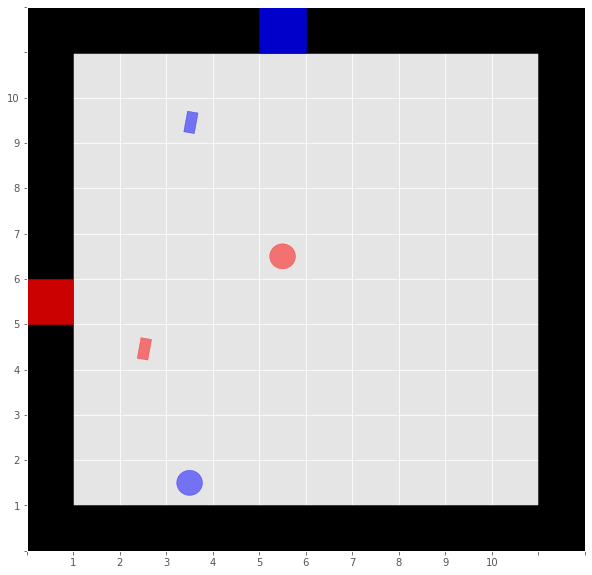

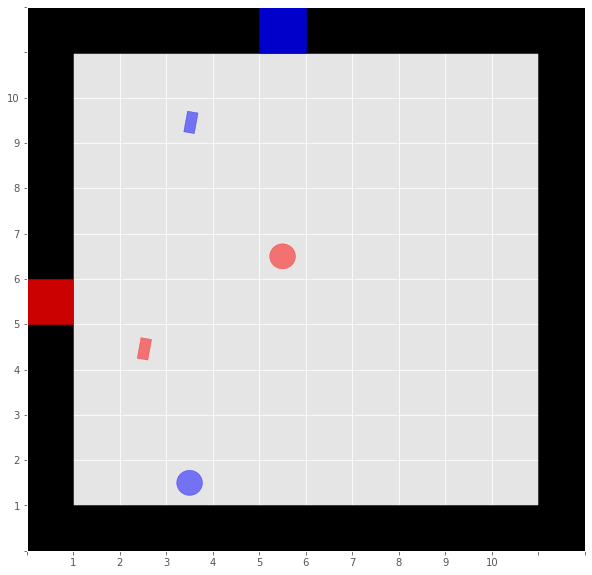

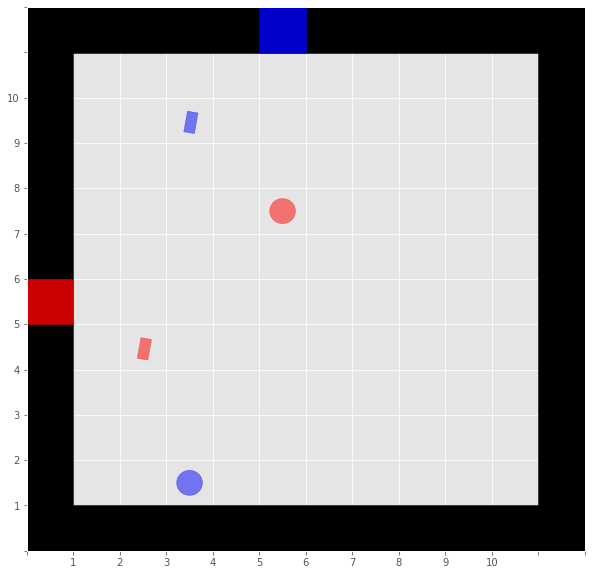

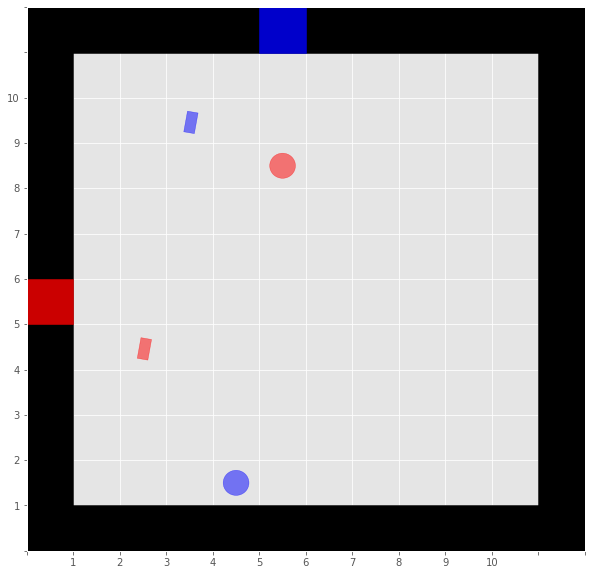

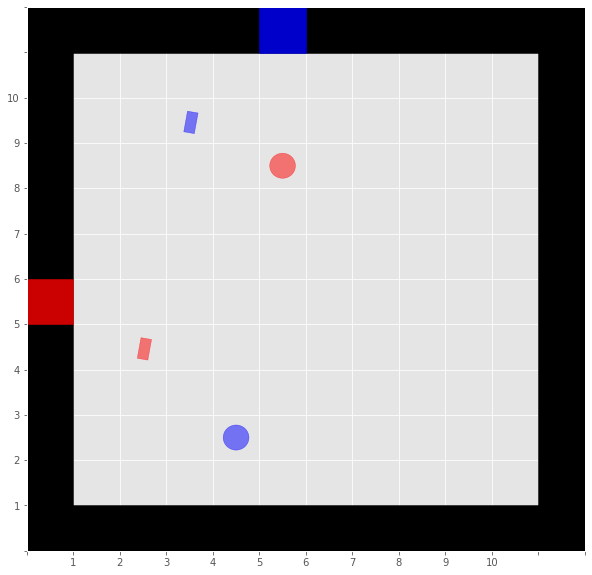

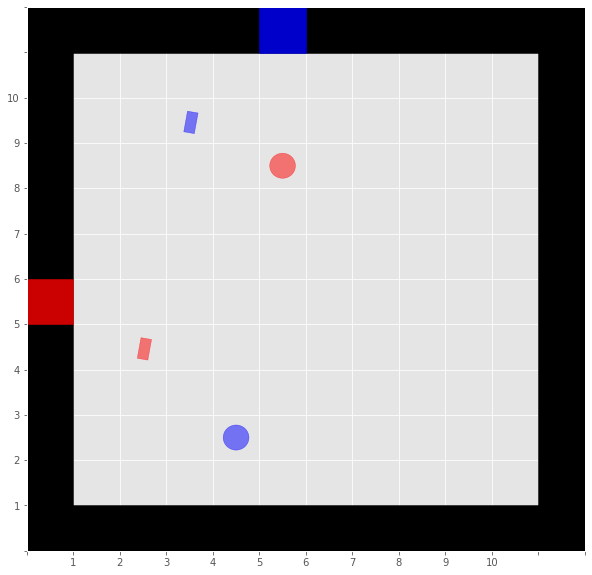

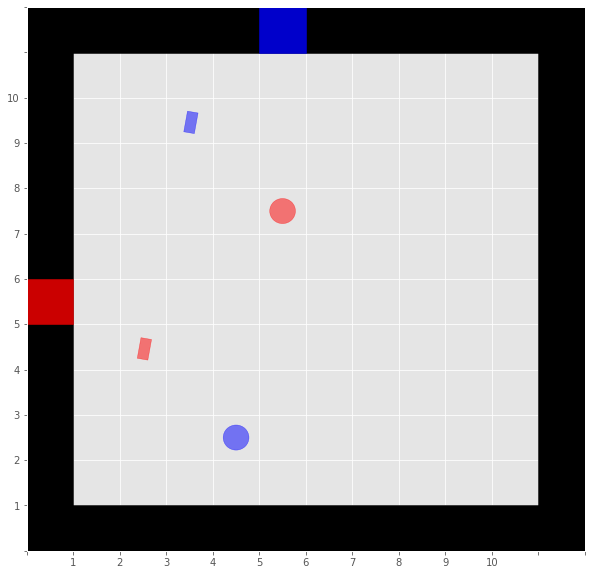

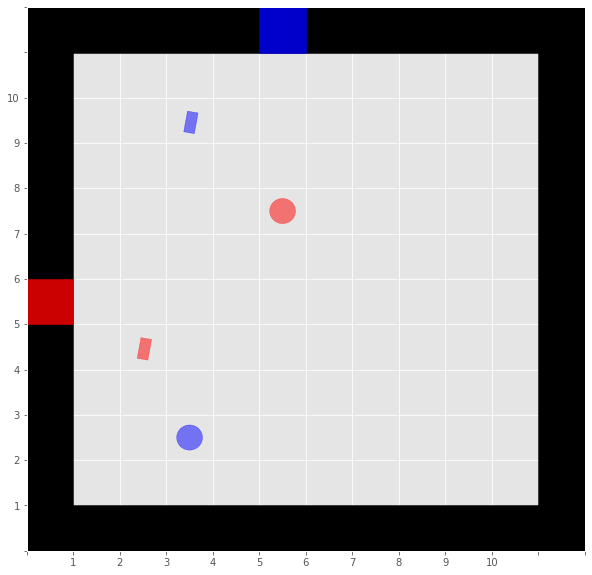

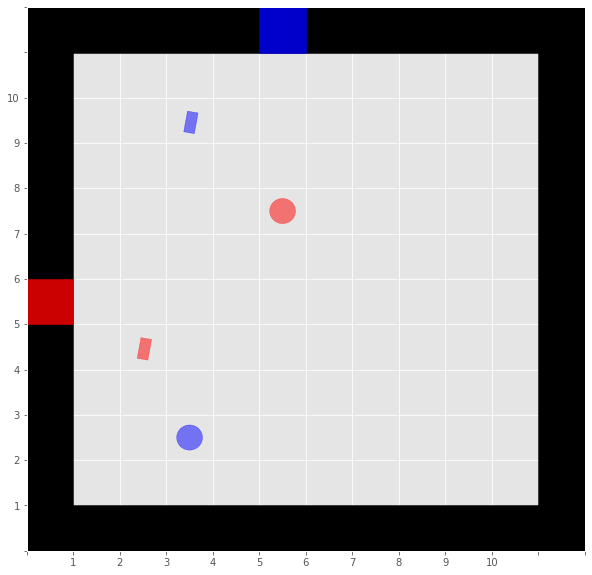

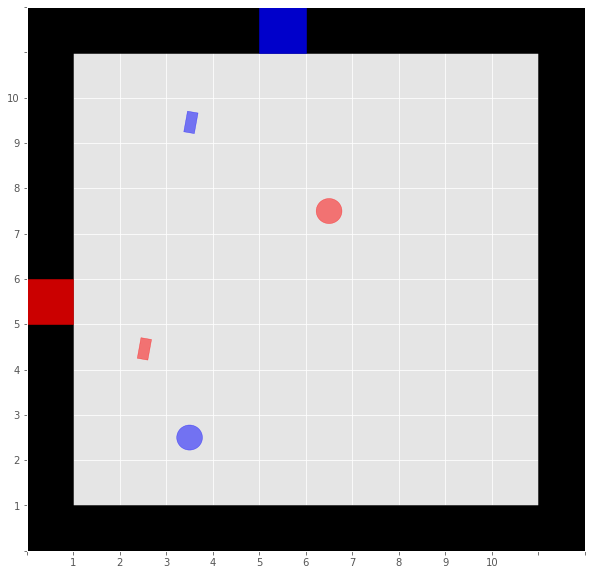

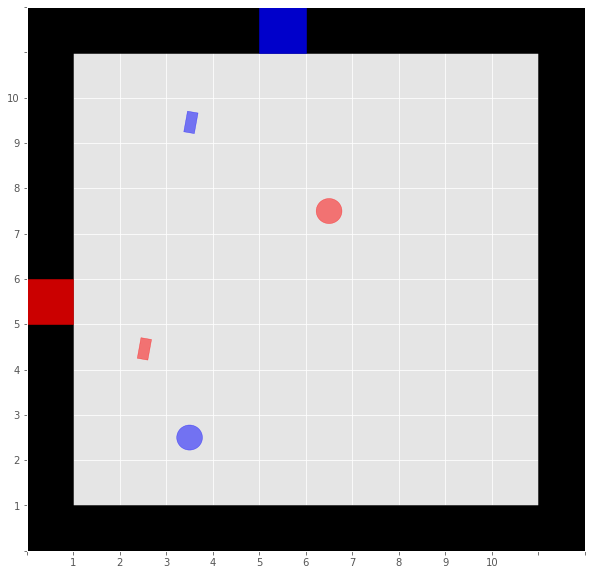

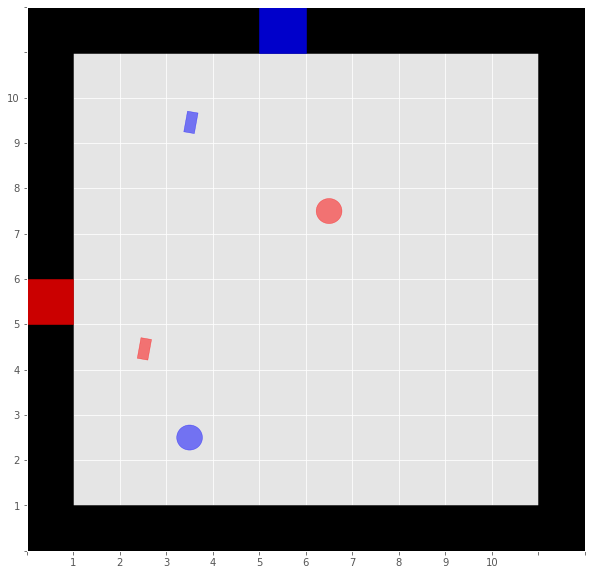

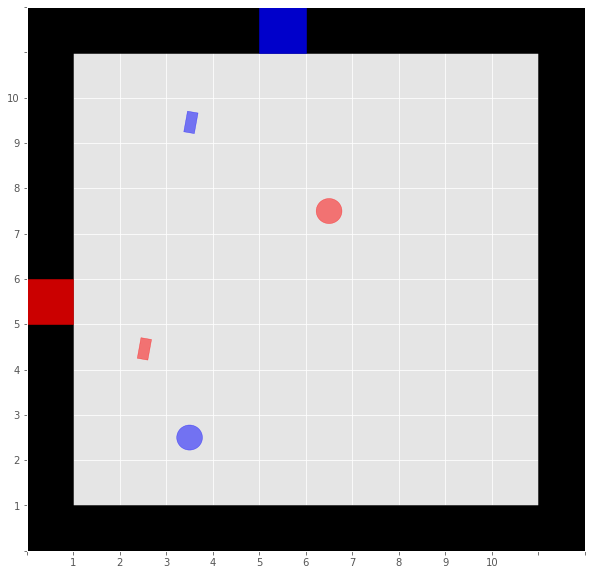

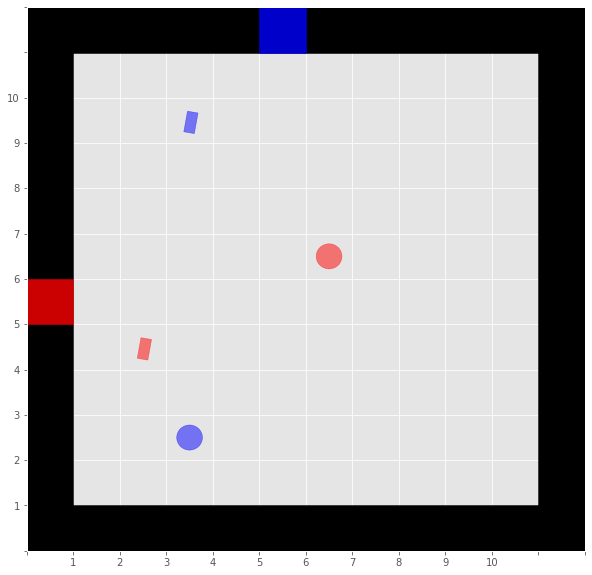

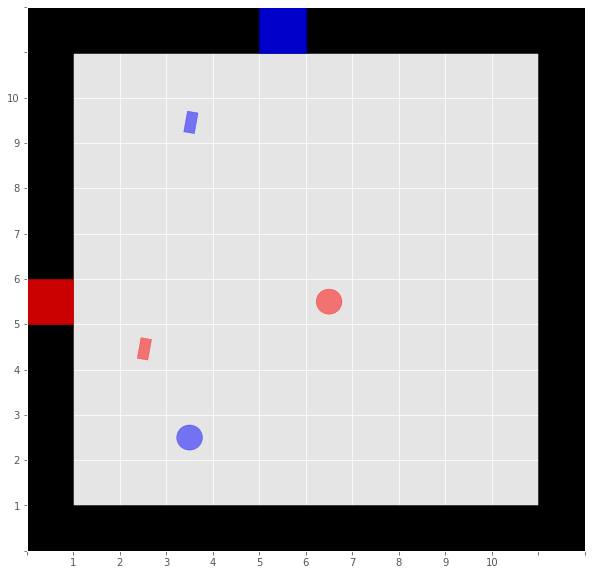

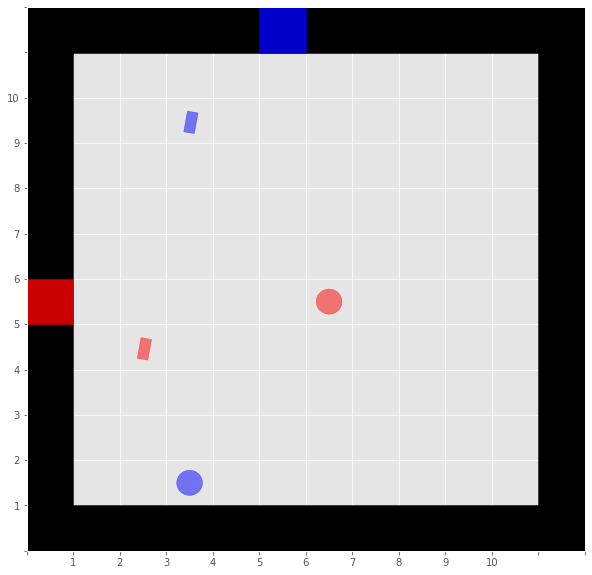

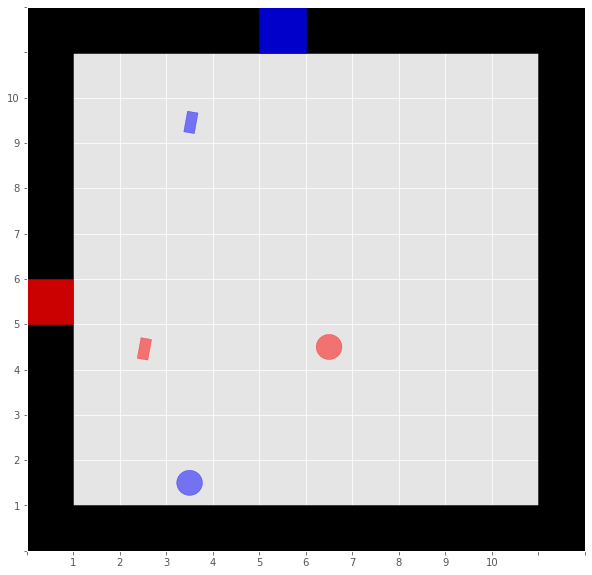

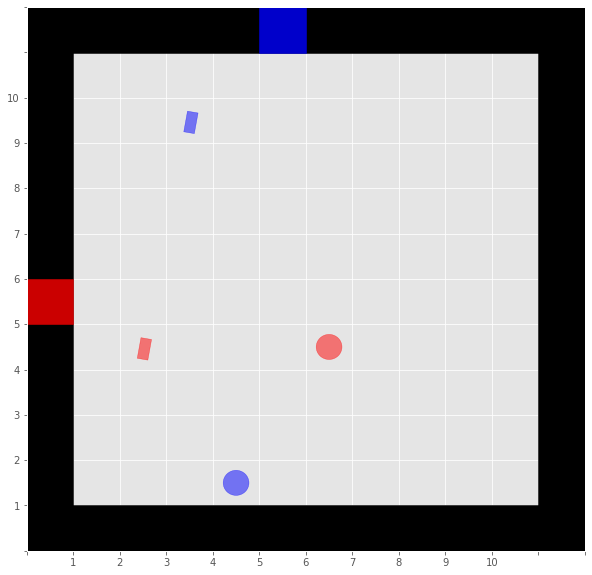

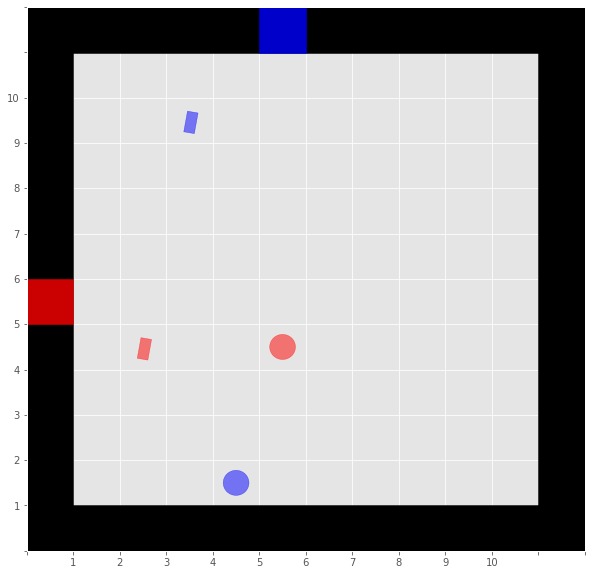

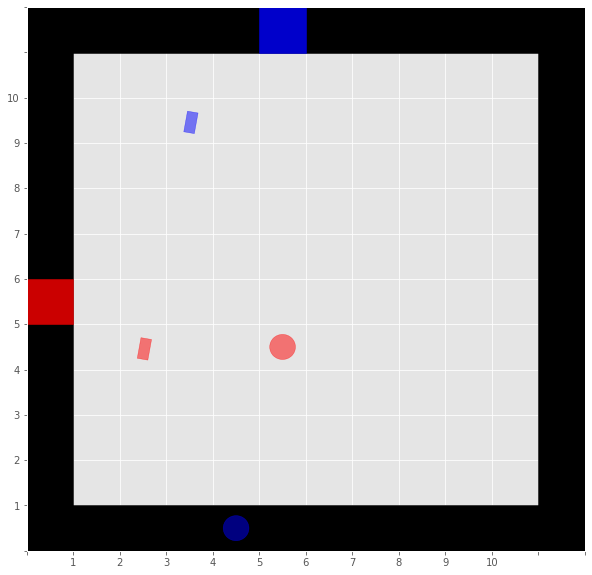

In [ ]:
# try some random stuff
world = EscapeRoom()
state=world.reset()
state,reward,done,_=world.step()
while not done:
  action1=random.randint(0,8)
  action2=random.randint(0,8)
  state,reward,done,_=world.step([action1,action2])
  world.render()

In [ ]:
q=defaultdict(int)
alpha=0.1
epsilon=1.0
gamma=0.99

def epsilon_greedy_policy(q,state,epsilon):
  actions=8
  if random.uniform(0,1)<epsilon:
    return [random.randint(0,actions-1),random.randint(0,actions-1)]
  else:
    l=-100000000000
    index=[]
    for i in np.arange(actions):
      for j in np.arange(actions):
        if q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]>l:
          l=q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]
          index=[i,j]
  return index

In [ ]:
def episode_simulator(epsilon):
  env = EscapeRoom()
  prev_state=env.reset()
  states=[]
  actions=[]
  rewards=[]
  while True:
    #env.render()
    action=epsilon_greedy_policy(q,prev_state,epsilon)
    print(action)
    next_state,reward,done,_=env.step(action)
    states.append(next_state)
    actions.append(action)
    rewards.append(reward)
    prev_state=next_state
    if done:
      break
  return(states,actions,rewards)

In [ ]:
episode_simulator(epsilon)

[3, 4]
[4, 5]
[3, 1]
[5, 2]


([[[3, 6], [1, 0], [2, 4], [3, 9], [], []],
  [[3, 6], [1, 0], [2, 4], [3, 9], [], []],
  [[3, 6], [1, 0], [2, 4], [3, 9], [], []],
  [[3, 6], [1, 0], [2, 4], [3, 9], [], []]],
 [[3, 4], [4, 5], [3, 1], [5, 2]],
 [[-1, -1], [-1, -1], [-1, -1], [-1, -1]])

In [ ]:
def update_qtable(q,prev_state,action,reward,next_state,alpha,gamma):
  actions=8
  qa=-1000000000
  for i in np.arange(actions):
    for j in np.arange(actions):
      if q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]>qa:
        qa=q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]

  q[(prev_state[0][0],prev_state[0][1],prev_state[1][0],prev_state[1][1],action[0],action[1])]=q[(prev_state[0][0],prev_state[0][1],prev_state[1][0],prev_state[1][1],action[0],action[1])]+alpha*(gamma*qa+reward-q[(prev_state[0][0],prev_state[0][1],prev_state[1][0],prev_state[1][1],action[0],action[1])])
  return q

# Learning the Q-function of agent 1 

In [ ]:
#i=0
q=defaultdict(lambda:1/8)
epsilon=1.0


no_iter=100000
avg_reward=[]

env=EscapeRoom()


for episode in np.arange(no_iter):
  
  r1=0
  i=1
  state=env.reset()

  while True:
    
    action=epsilon_greedy_policy(q,state,epsilon*(1-episode/no_iter))

    next_state,reward,done,_=env.step(action)

    update_qtable(q,state,action,reward[0],next_state,alpha,gamma)

    r1+=reward[0]

    state=next_state

    i+=1

    #print(reward)

    #print(done)
    if done:
      avg_reward.append(r1/i)
      #if reward[0]==5:
        #print(i,"reached end...")
      break
#env.close()

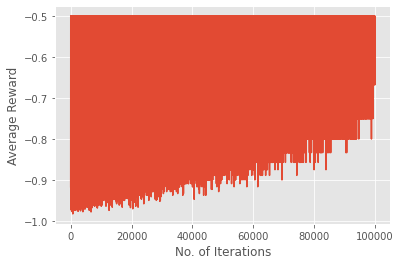

In [ ]:
import matplotlib.pyplot as plt
plt.plot(avg_reward)
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")
plt.show()

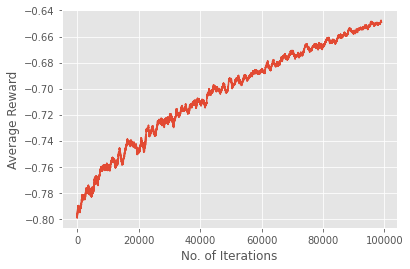

In [ ]:
avg_reward2=[]
r=0

drange=500
for i in np.arange(drange,len(avg_reward)-drange):
  r=np.mean(avg_reward[i-drange:i+drange])
  avg_reward2.append(r)

plt.plot(avg_reward2)
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")
plt.show()

In [ ]:
q

defaultdict(<function __main__.<lambda>>,
            {(4, 6, 2, 1, 0, 0): -0.8762499999999995,
             (4, 6, 2, 1, 0, 1): -0.8762499999999995,
             (4, 6, 2, 1, 0, 2): 0.125,
             (4, 6, 2, 1, 0, 3): -0.8762499999999995,
             (4, 6, 2, 1, 0, 4): -0.8762496815957401,
             (4, 6, 2, 1, 0, 5): -0.8762499999999995,
             (4, 6, 2, 1, 0, 6): -0.8762498307869218,
             (4, 6, 2, 1, 0, 7): -0.8762499999999995,
             (4, 6, 2, 1, 1, 0): -0.8762499999999995,
             (4, 6, 2, 1, 1, 1): -0.8762499999999995,
             (4, 6, 2, 1, 1, 2): 0.125,
             (4, 6, 2, 1, 1, 3): -0.8762499999999995,
             (4, 6, 2, 1, 1, 4): -0.8762496069083211,
             (4, 6, 2, 1, 1, 5): -0.8762499999999995,
             (4, 6, 2, 1, 1, 6): -0.8762498889792993,
             (4, 6, 2, 1, 1, 7): -0.8762499999999995,
             (4, 6, 2, 1, 2, 0): 0.125,
             (4, 6, 2, 1, 2, 1): 0.125,
             (4, 6, 2, 1, 2, 2): 0.125,
  

In [ ]:
def epsilon_greedy_policy(q,state,epsilon):
  actions=8
  if random.uniform(0,1)<epsilon:
    return [random.randint(0,actions-1),random.randint(0,actions-1)]
  else:
    l=-100000000000
    index=[]
    for i in range(actions):
      for j in range(actions):
        if q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]>l:
          l=q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]
          index=[i,j]
  return index

In [ ]:
state

[[4, 5], [2, 0], [2, 4], [3, 9], [], []]

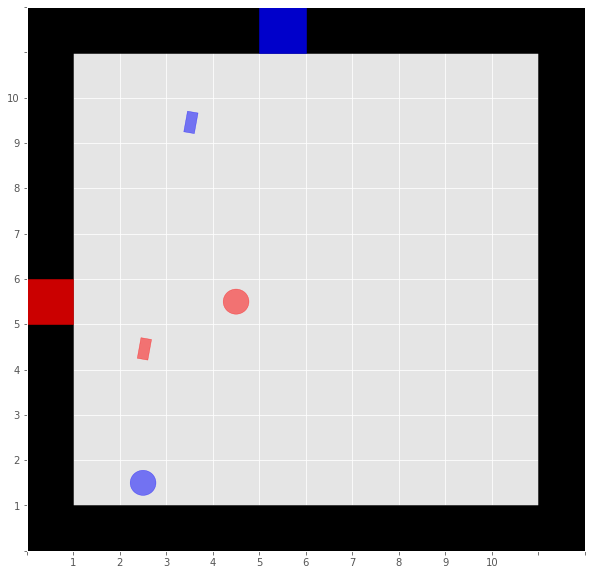

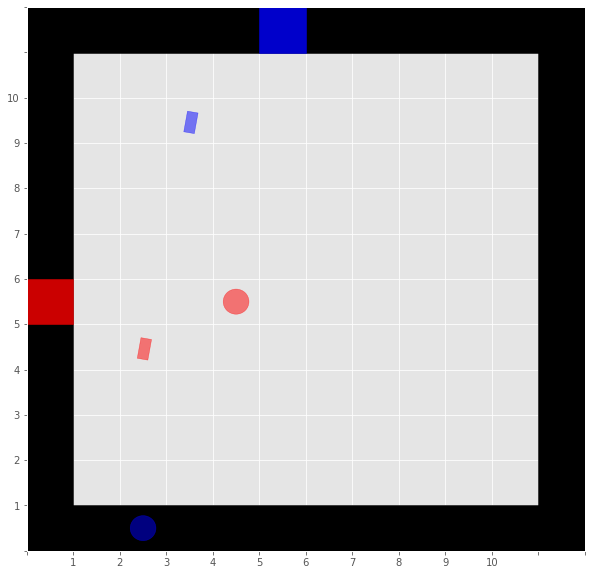

In [ ]:
world = EscapeRoom()
state=world.reset()
state,reward,done,_=world.step()
while not done:
  action=epsilon_greedy_policy(q,state,0.8)
  state,reward,done,_=world.step(action)
  world.render()

# DQN approach for agent 1 Q-function learning

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
actions=defaultdict(int)
val=0
for i in np.arange(0,9):
  for j in np.arange(0,9):
    actions[(i,j)]=val
    val+=1

In [ ]:
get_actions=defaultdict(tuple)
for i in np.arange(81):
  get_actions[list(actions.values())[i]]=list(actions.keys())[i]

In [ ]:
actions[(2,0)]

18

In [ ]:
class DQN(nn.Module):
  def __init__(self,in_channels,out_channels):
    super(DQN,self).__init__()
    self.model=nn.Sequential(
        nn.Linear(in_channels,1000),
        nn.Linear(1000,500),
        nn.Linear(500,100)
    )

    self.agentA=nn.Sequential(
        nn.Linear(100,out_channels),
        nn.ReLU()
    )

    self.agentB=nn.Sequential(
        nn.Linear(100,out_channels),
        nn.ReLU()
    )

  def forward(self,x):
    return self.agentA(self.model(x)),self.agentB(self.model(x))

In [ ]:
len_states=4
len_actions=8

In [ ]:
model=DQN(len_states,len_actions)
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
criterion = torch.nn.MSELoss()
from torch.autograd import Variable

In [ ]:
from torch.nn.modules import loss
#i=0
q=defaultdict(int)
epsilon=1.0
no_actions=9

no_iter=3
avg_reward=[]

env=EscapeRoom()

gamma=0.97

#loss1=torch.Tensor([0.0])

for episode in np.arange(no_iter):

  r1=0
  i=1
  state=env.reset()
  epsilon=epsilon*(1-episode/no_iter)

  reward_tensor = Variable(torch.Tensor([0.0]), requires_grad=True)

  steps=0.0

  while True:


    state=np.array(state[0:2]).flatten()
    out=model(torch.Tensor(state))

    #print(out)

    action_A=torch.argmax(out[0])
    action_B=torch.argmax(out[1])

    next_state,reward,done,_=env.step([action_A.item(),action_B.item()])

    #print(model(torch.Tensor(np.array(next_state[0:2]).flatten()))[0])

    q_star=torch.max(model(torch.Tensor(np.array(next_state[0:2]).flatten()))[0]).item()

    #loss1 = torch.add(loss1,criterion(reward[0]+gamma*q_star,torch.max(out[0])))

    #print(reward[0]+gamma*q_star,torch.max(out[0]).item())

    reward_tensor = Variable(torch.tensor([reward[0]+gamma*q_star]), requires_grad=True)


    loss1=criterion(reward_tensor,torch.max(out[0]))

    print(loss1)


    r1+=reward[0]
    state=next_state

    optimizer.zero_grad()
    loss1.backward()
    optimizer.step()

    print(out)

    steps+=1

    if done==True or steps==200.0:
      avg_reward.append(r1/i)
      #print(out)
      break
#env.close()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(1., grad_fn=<MseLossBackward0>)
(tensor([0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<ReluBackward0>), tensor([0.0000, 0.6144, 0.0000, 1.3828, 0.0000, 0.0000, 0.8358, 1.2036],
       grad_fn=<ReluBackward0>))
tensor(1., grad_fn=<MseLossBackward0>)
(tensor([0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<ReluBackward0>), tensor([0.0000, 0.6144, 0.0000, 1.3828, 0.0000, 0.0000, 0.8358, 1.2036],
       grad_fn=<ReluBackward0>))
tensor(1., grad_fn=<MseLossBackward0>)
(tensor([0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<ReluBackward0>), tensor([0.0000, 0.6144, 0.0000, 1.3828, 0.0000, 0.0000, 0.8358, 1.2036],
       grad_fn=<ReluBackward0>))
tensor(1., grad_fn=<MseLossBackward0>)
(tensor([0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<ReluBackward0>), tensor([0.0000, 0.6144, 0.0000, 1.3828, 0.0000, 0.0000, 0.8358, 1.2036],
       grad_fn=<ReluBackward0>))
tensor(1., grad_fn=<MseLossBackward0>)
(tensor([0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<ReluBackward0>), tensor([0.0000, 0.6144, 0.0000, 1.3828, 0

In [ ]:
plt.plot(avg_reward)
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")
plt.show()

NameError: ignored

In [ ]:
reward_tensor = Variable(torch.Tensor([0.0]), requires_grad=True)

In [ ]:
reward_tensor.item

8

In [ ]:
reward_tensor

tensor([0.], requires_grad=True)